In [1]:
# https://datatofish.com/k-means-clustering-python/

In [2]:
from pandas import DataFrame

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.mixture import GaussianMixture 

In [5]:
import numpy as np

In [6]:
clutser_size = 100

In [7]:
center_a = [5,2]
center_b = [2, 5]
center_c = [8, 8]

In [8]:
np.random.seed(42)

In [9]:
Data = np.vstack((np.random.normal(size=(clutser_size,2))+np.tile(center_a,(clutser_size,1)),
          np.random.normal(size=(clutser_size,2))+np.tile(center_b,(clutser_size,1)),
          np.random.normal(size=(clutser_size,2))+np.tile(center_c,(clutser_size,1))))

In [10]:
'''
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
'''

"\nData = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],\n        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]\n       }\n"

In [12]:
df = DataFrame(Data,columns=['x','y'])

In [15]:
gmm = GaussianMixture(n_components=3).fit(df)
means = gmm.means_
covariances = gmm.covariances_
print(means, covariances)

[[ 7.95474024  7.87357331]
 [ 2.04532046  5.10150162]
 [ 4.85349889  2.09782825]] [[[ 1.04105164  0.08520551]
  [ 0.08520551  0.92352911]]

 [[ 0.96094034  0.05182188]
  [ 0.05182188  0.81550951]]

 [[ 0.70731227 -0.03781123]
  [-0.03781123  1.05269312]]]


In [24]:
gmm.means_[:,0]

array([ 7.95474024,  2.04532046,  4.85349889])

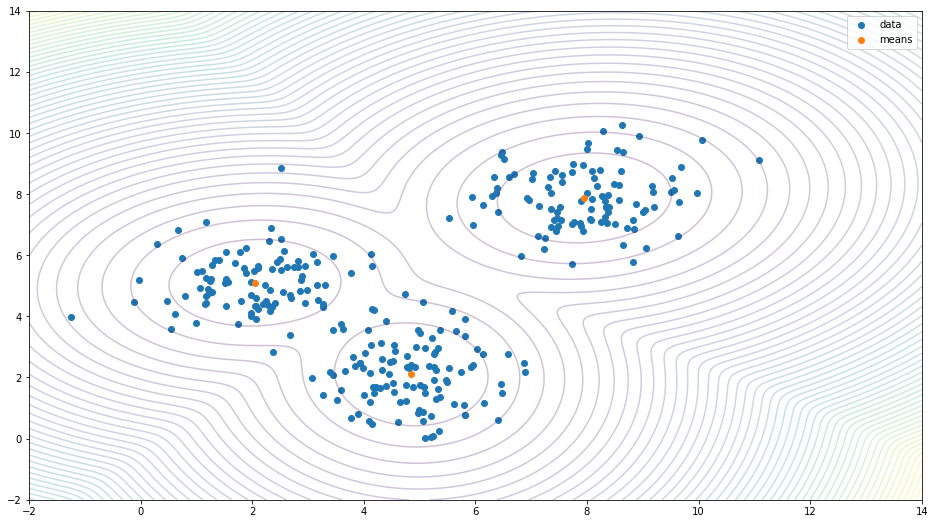

In [26]:
fig,axs = plt.subplots(figsize=(16,9))
x = np.linspace(-2., 14.,num=300)
y = np.linspace(-2., 14.,num=300)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -gmm.score_samples(XX)
Z = Z.reshape(X.shape)

axs.contour(X, Y, Z,levels=np.linspace(np.min(Z),np.max(Z),50),alpha=.25)

axs.scatter(df['x'],df['y'],label="data")
axs.scatter(gmm.means_[:,0],gmm.means_[:,1],label="means")
axs.legend()